# Importing Libraries

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset And Exploring it 

In [44]:
df = pd.read_csv('Downloads/fertilizer_recommendation_dataset.csv')

In [45]:
df.head()

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0    50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1    21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2    23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3    26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4    21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   

    Potassium    Carbon        Soil  Crop                  Fertilizer  \
0   96.429065  0.496300  Loamy Soil  rice                     Compost   
1  148.128347  1.234242  Loamy Soil  rice     Balanced NPK Fertilizer   
2   80.308971  1.795650  Peaty Soil  rice  Water Retaining Fertilizer   
3  153.005712  1.517556  Loamy Soil  rice     Balanced NPK Fertilizer   
4   97.000886  1.782985  Peaty Soil  rice          Organic Fertilizer   

                                              Remark  
0  Enhances organic matter and improves soil stru...  
1  Provides a balanced mix of nitrogen, phosphoru...  
2  Improves water retention in dry soils. Prefer ...  
3  Provides a balanced mix of nitrogen, phosphoru...  
4  Enhances fertility naturally, ideal for peaty ...

In [46]:
#Get infomation of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Moisture     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
 10  Fertilizer   3100 non-null   object 
 11  Remark       3100 non-null   object 
dtypes: float64(8), object(4)
memory usage: 290.8+ KB


In [47]:
# Descriptive Statistics of the data(numerical features only)
df.describe()

Temperature     Moisture     Rainfall           PH     Nitrogen  \
count  3100.000000  3100.000000  3100.000000  3100.000000  3100.000000   
mean     27.271096     0.600763   111.024949     6.379775    61.278480   
std       9.114450     0.144947    77.151880     0.957103    10.186410   
min       4.011486     0.227436   -85.709593     3.448974    35.527718   
25%      22.408505     0.493595    61.283985     5.860489    54.835715   
50%      26.132938     0.599520    96.485935     6.337308    59.429649   
75%      29.987887     0.708575   147.619401     6.899739    65.792790   
max      56.653592     0.972361   411.955947     9.562341    98.581039   

       Phosphorous    Potassium       Carbon  
count  3100.000000  3100.000000  3100.000000  
mean     69.582850    69.721167     1.474325  
std      42.226712    35.304241     0.698300  
min     -37.649739   -20.509108    -0.280560  
25%      43.039260    49.992405     0.956401  
50%      58.205269    58.710808     1.463357  
75%      86.108983    76.318626     2.003534  
max     177.314481   161.067982     3.241984

## Observation made from the above exploration
### Fetures or columns(Soil,Fertilizer,Crop and Remark) are of type object meaning they contain characters. I need to encode them since Machine learning algorithms deals with numbers(floats and integers)
### Looking at the descriptive statistics of the data I can observe that minimum value for Rainfall is -85.709593, Phosphorous is -37.649739,Potassium is -20.509108 and that of Carbon is -0.280560.
### Since the minimum value of those columns can't be zero in real world except that of Rainfall(no rain), it is an error . 

In [48]:
# Selecting columns with values less than or equal to 0
invald_val = df[['Potassium', 'Phosphorous', 'Carbon', 'Rainfall']]

# Counting values ≤ 0 in those columns
for col in invald_val .columns:
    count = (invald_val[col] <= 0).sum()
    print(f"{col}: {count} values ≤ 0")

Potassium: 71 values ≤ 0
Phosphorous: 78 values ≤ 0
Carbon: 85 values ≤ 0
Rainfall: 75 values ≤ 0


In [49]:
#Since a 0 value for rainfall is valid I take a look if any is present
zero_count = (df['Rainfall'] == 0).sum()
print(f"Rainfall has {zero_count} zero values.")


Rainfall has 0 zero values.


In [50]:
invald_val = df[['Potassium', 'Phosphorous', 'Carbon', 'Rainfall']]

# Replacing values ≤ 0 with NaN
for col in invald_val.columns:
    df.loc[df[col] <= 0, col] = np.nan

In [51]:
# checking for duplicate values
df.duplicated().sum()

0

In [52]:
#cheking for missing values which are present because I replaced invalid values with np.nan (not a number)
df.isnull().sum()

Temperature     0
Moisture        0
Rainfall       75
PH              0
Nitrogen        0
Phosphorous    78
Potassium      71
Carbon         85
Soil            0
Crop            0
Fertilizer      0
Remark          0
dtype: int64

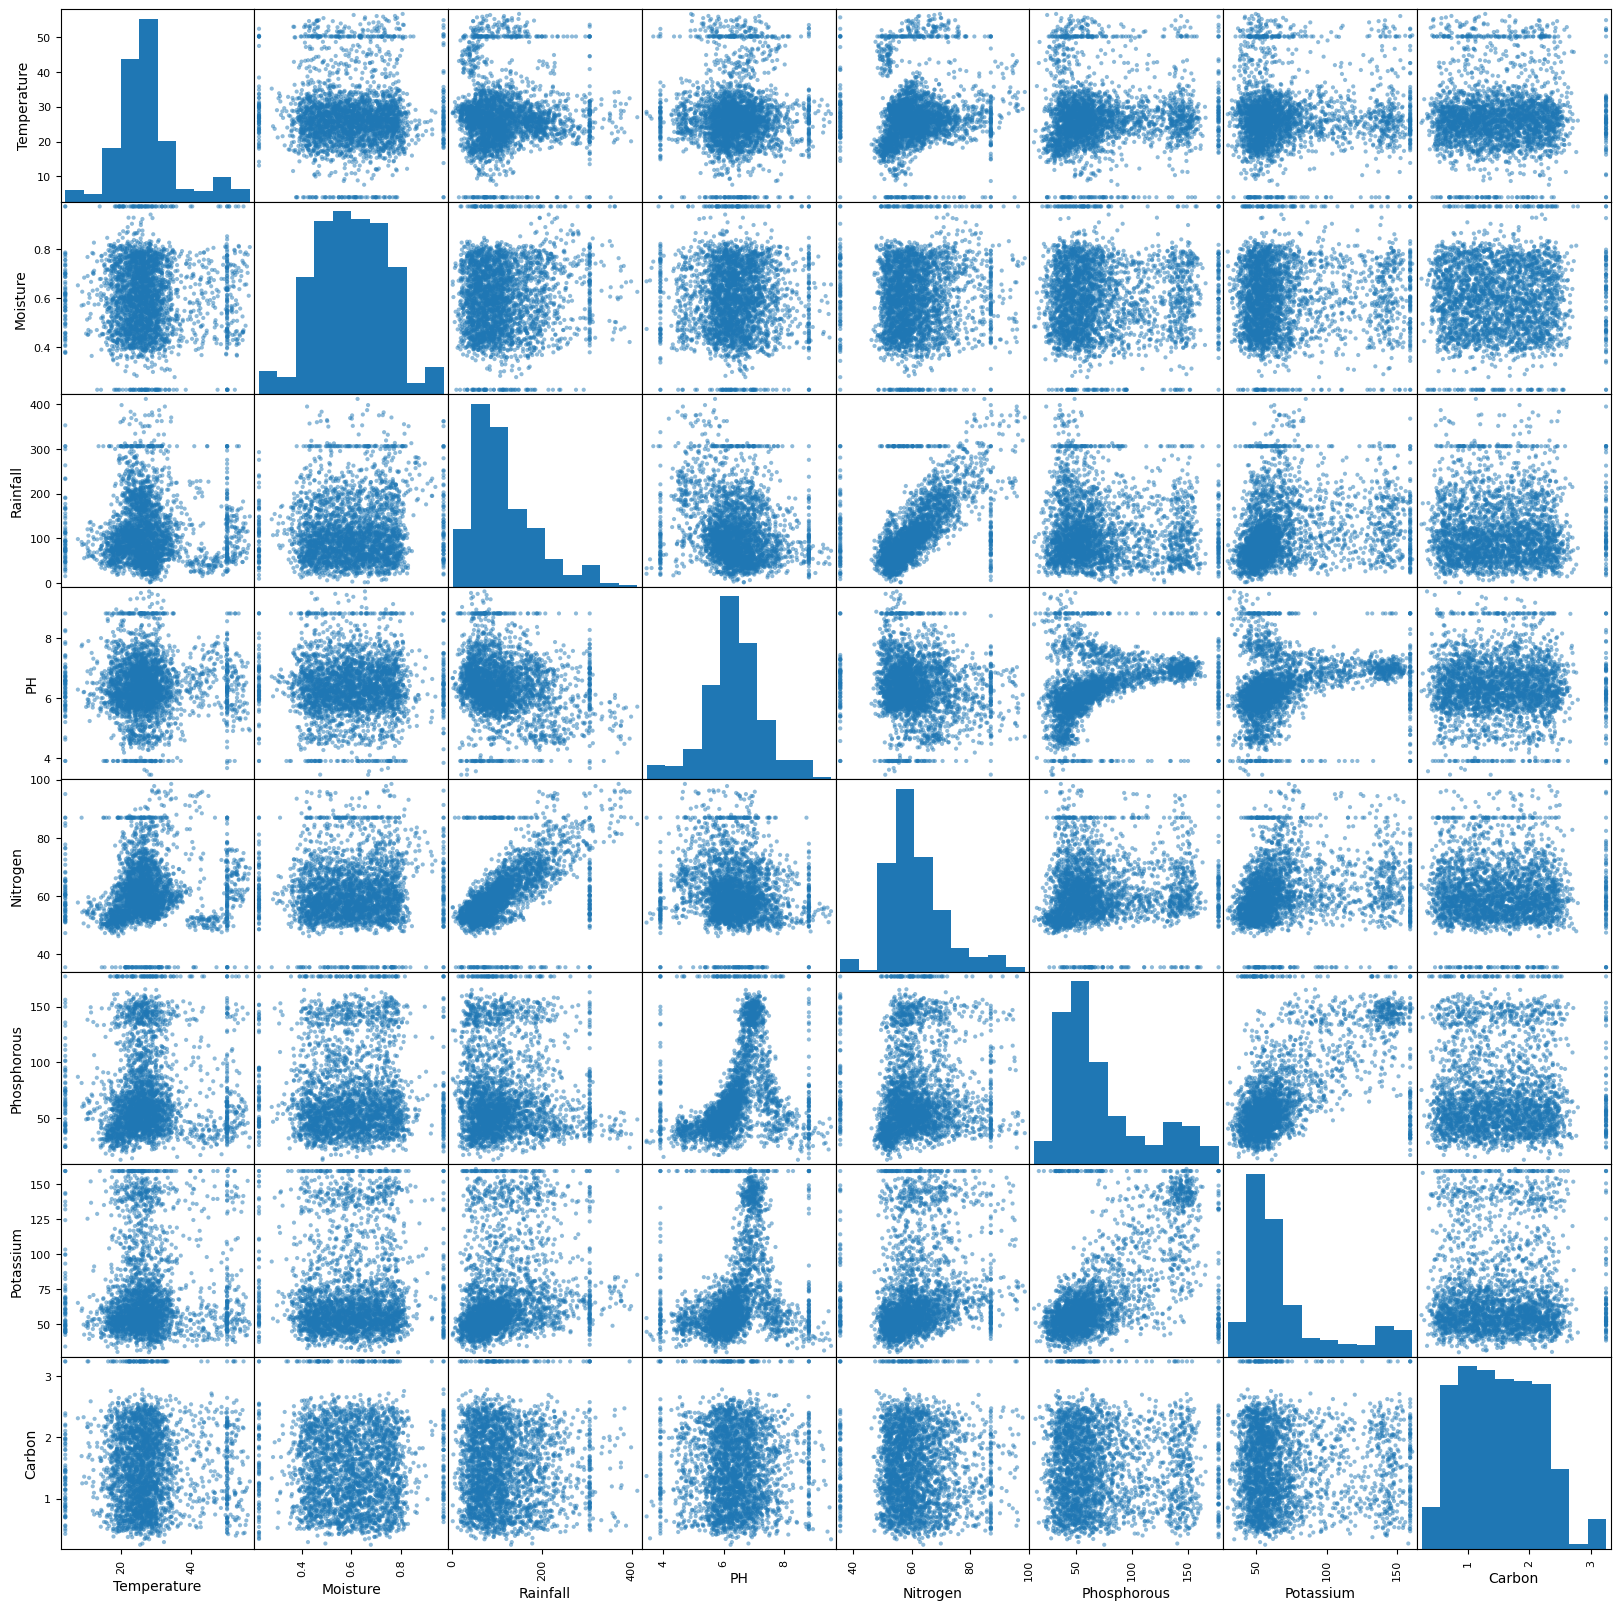

In [53]:
# A scatter matrix to help me get the distribution and correlation of the features or columns which are numeric
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(20,20))
plt.show()

# Spliting dataset early to prevent data leakage which makes the model to overfit

In [54]:
y=df.Fertilizer
X= df.drop(columns=['Remark','Fertilizer'])

In [55]:
X

Temperature  Moisture    Rainfall        PH   Nitrogen  Phosphorous  \
0       50.179845  0.725893  205.600816  6.227358  66.701872    76.963560   
1       21.633318  0.721958  306.081601  7.173131  71.583316   163.057636   
2       23.060964  0.685751  259.336414  7.380793  75.709830    62.091508   
3       26.241975  0.755095  212.703513  6.883367  78.033687   151.012521   
4       21.490157  0.730672  268.786767  7.578760  71.765123    66.257371   
...           ...       ...         ...       ...        ...          ...   
3095    23.486430  0.531191   46.412228  6.733584  56.534283   146.111078   
3096    24.289508  0.736699   63.068103  6.372709  56.358005    49.003277   
3097    23.945488  0.520513   41.344590  7.051515  55.738905   148.567285   
3098    26.368604  0.547436   33.106012  6.615922  57.711705    96.662953   
3099    27.670724  0.558722   50.670082  8.828433  59.967605    78.787005   

       Potassium    Carbon          Soil        Crop  
0      96.429065  0.496300    Loamy Soil        rice  
1     148.128347  1.234242    Loamy Soil        rice  
2      80.308971  1.795650    Peaty Soil        rice  
3     153.005712  1.517556    Loamy Soil        rice  
4      97.000886  1.782985    Peaty Soil        rice  
...          ...       ...           ...         ...  
3095   81.389366  1.602913  Neutral Soil  watermelon  
3096   46.695889  1.473656    Peaty Soil  watermelon  
3097   90.057021  1.455045  Neutral Soil  watermelon  
3098   59.531473  0.614487   Acidic Soil  watermelon  
3099   45.327125  1.472728   Acidic Soil  watermelon  

[3100 rows x 10 columns]

In [56]:
pd.DataFrame(y)

Fertilizer
0                        Compost
1        Balanced NPK Fertilizer
2     Water Retaining Fertilizer
3        Balanced NPK Fertilizer
4             Organic Fertilizer
...                          ...
3095  Water Retaining Fertilizer
3096                         DAP
3097  Water Retaining Fertilizer
3098                     Compost
3099           Muriate of Potash

[3100 rows x 1 columns]

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=44)

In [58]:
# Skew to help me know the type of distribution . Is it Gaussian or not? which would help me know the imputation strategy to use 
x_test[['Rainfall','Phosphorous','Potassium','Carbon']].skew()

Rainfall       1.229406
Phosphorous    1.106554
Potassium      1.409528
Carbon         0.301158
dtype: float64

In [59]:
x_train[['Rainfall','Phosphorous','Potassium','Carbon']].skew()

Rainfall       1.232074
Phosphorous    1.124214
Potassium      1.458287
Carbon         0.374783
dtype: float64

In [60]:
# Since the skewness are high(does not have a Gaussian distribution), I will impute using the median value of each column
for col in ['Rainfall', 'Phosphorous', 'Potassium']:
    x_train[col] = x_train[col].fillna(x_train[col].median())

In [61]:
for col in ['Rainfall', 'Phosphorous', 'Potassium']:
    x_test[col] = x_test[col].fillna(x_train[col].median())

In [62]:
# since the skewness of carbon is less than 1 and also can be confirmed from our scatter matrix to have a Gaussian or close to Gaussion distribution
#I would impute it using its mean

x_train['Carbon'] = x_train['Carbon'].fillna(x_train['Carbon'].mean())

x_test['Carbon'] = x_test['Carbon'].fillna(x_test['Carbon'].mean())


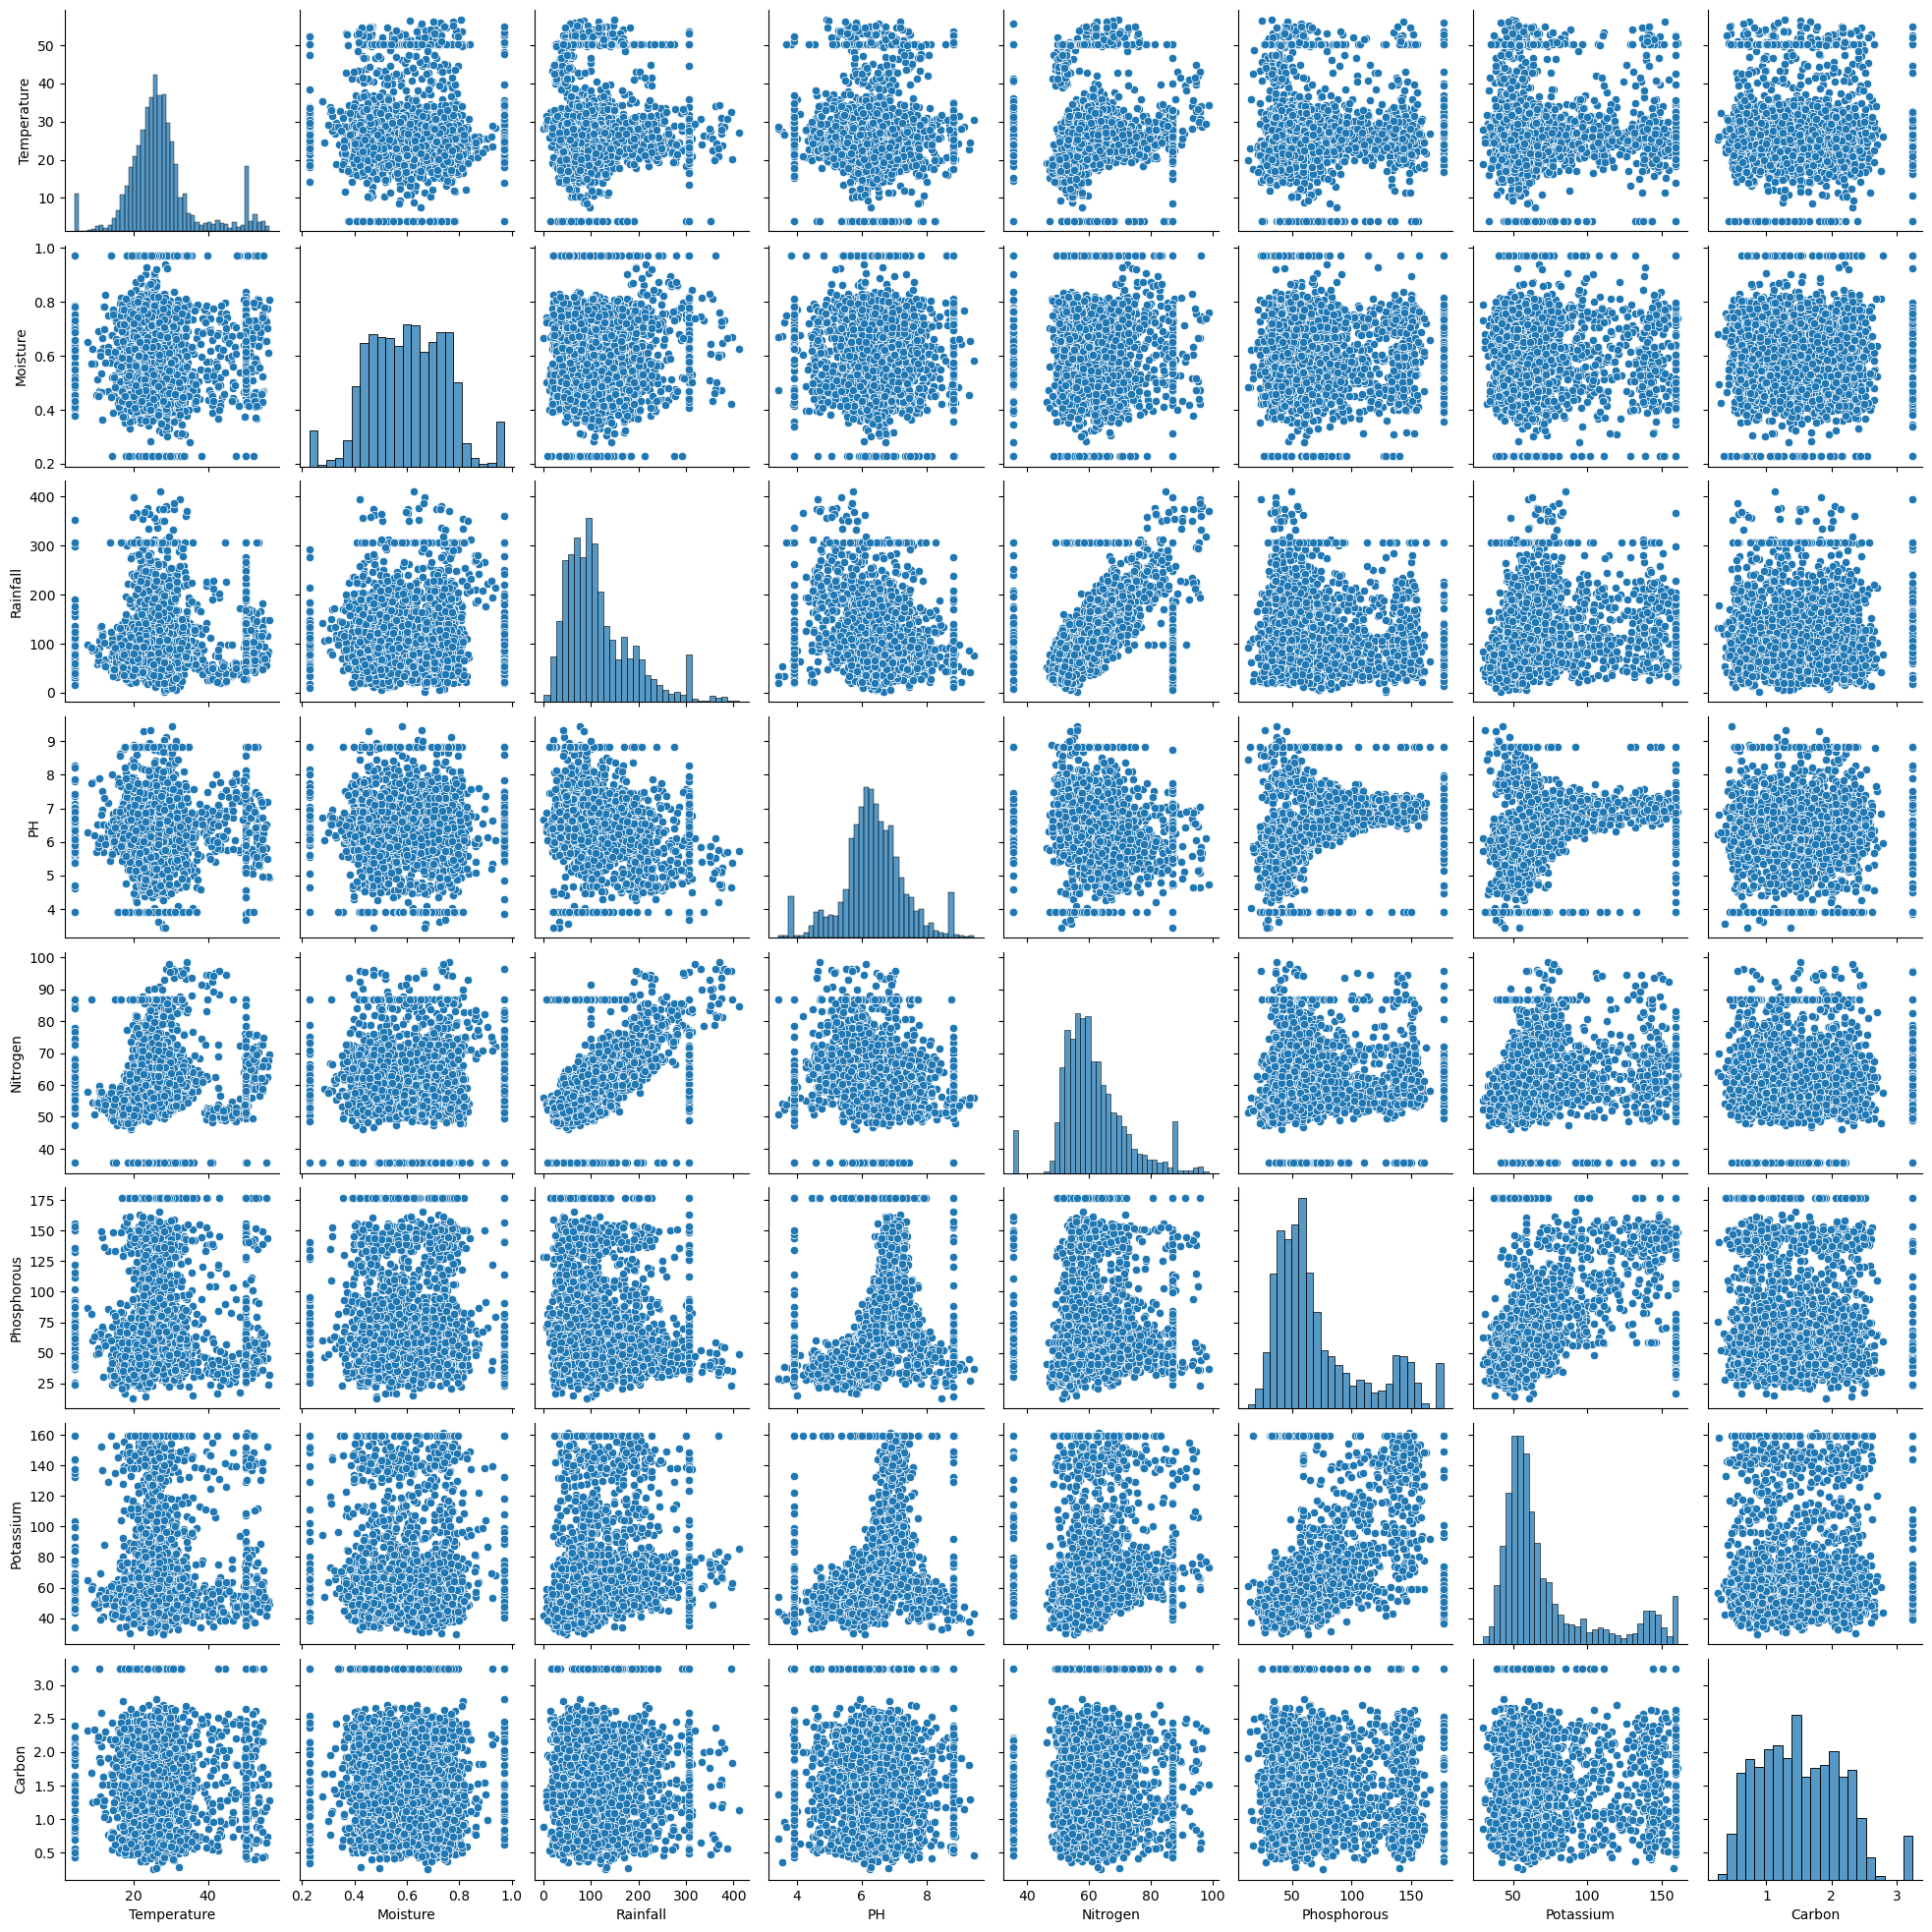

In [63]:
sns.pairplot(data=x_train)
plt.show()

In [64]:
#checking if all missing values are replaced
x_train.isnull().sum()

Temperature    0
Moisture       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

In [65]:
x_test.isnull().sum()

Temperature    0
Moisture       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
dtype: int64

#  Encoding Categorical Features

In [66]:
# Label encoding the target feature
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()

In [68]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [69]:
y_train

array([2, 2, 2, ..., 2, 9, 0])

In [70]:
for i ,labels in enumerate(le.classes_):
    print(labels,':',i)

Balanced NPK Fertilizer : 0
Compost : 1
DAP : 2
General Purpose Fertilizer : 3
Gypsum : 4
Lime : 5
Muriate of Potash : 6
Organic Fertilizer : 7
Urea : 8
Water Retaining Fertilizer : 9


# Outlier detection

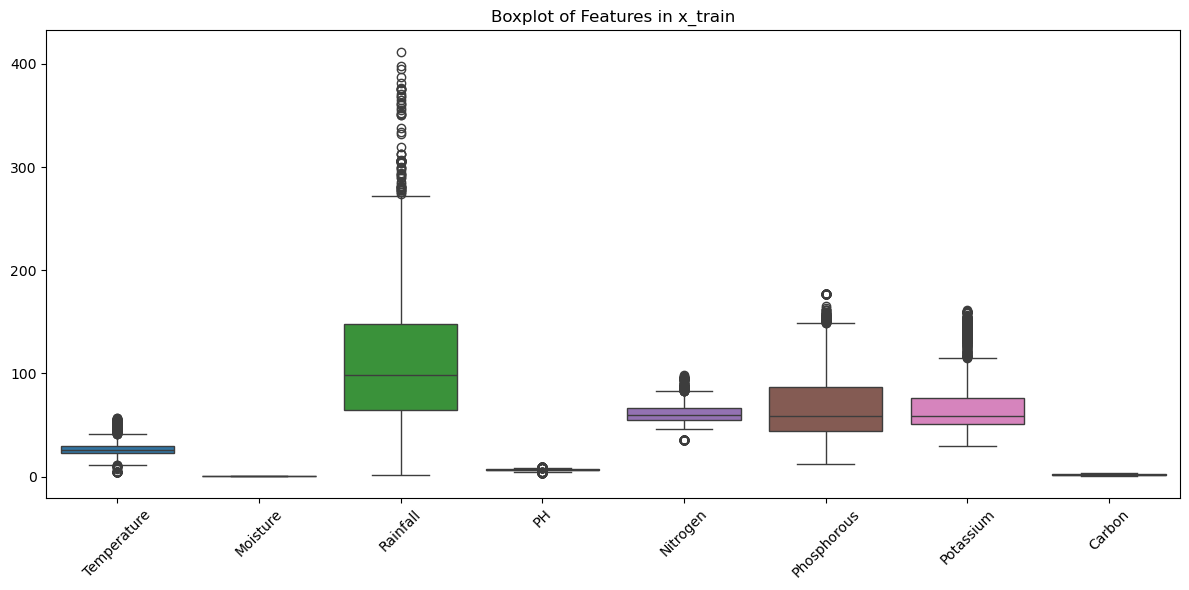

In [71]:
#boxplot to detect outliers
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=x_train)
plt.xticks(rotation=45)
plt.title("Boxplot of Features in x_train")
plt.tight_layout()
plt.show()

In [72]:
#taking a look at the shape of the dataset to help me know how to handle the outliers based on the amount of data.
#Should I remove or cap them.
x_train.shape

(2325, 10)

In [73]:
x_train[['Temperature','Rainfall','PH','Nitrogen','Phosphorous','Potassium']].skew()

Temperature    0.907171
Rainfall       1.258062
PH             0.038655
Nitrogen       0.739554
Phosphorous    1.157895
Potassium      1.485096
dtype: float64

In [74]:
#reducing influence of outliers using log transform
x_train[['Temperature','Rainfall','Nitrogen','Phosphorous','Potassium']]=np.log1p(x_train[['Temperature','Rainfall','Nitrogen','Phosphorous','Potassium']])

In [75]:
x_test[['Temperature','Rainfall','Nitrogen','Phosphorous','Potassium']]=np.log1p(x_test[['Temperature','Rainfall','Nitrogen','Phosphorous','Potassium']])

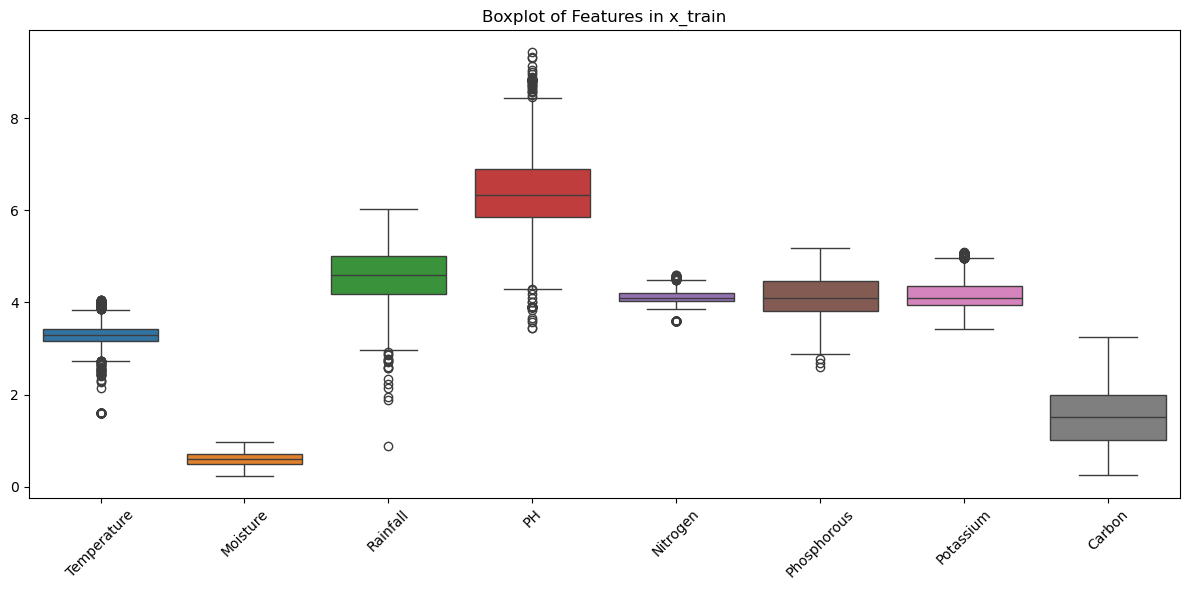

In [76]:
plt.figure(figsize=(12, 6)) 
sns.boxplot(data=x_train)
plt.xticks(rotation=45)
plt.title("Boxplot of Features in x_train")
plt.tight_layout()
plt.show()

<Axes: ylabel='Count'>

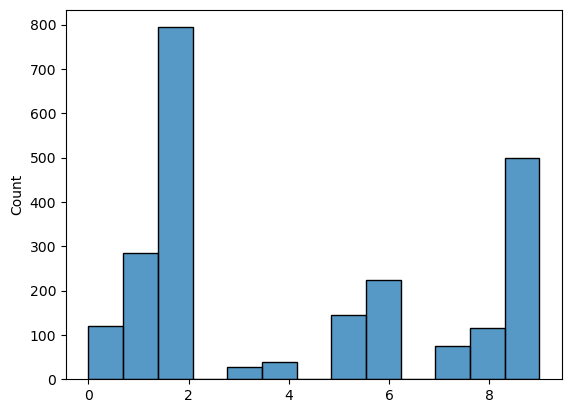

In [77]:
#Checking for class  imbalance
sns.histplot(data=y_train)

### My observation made from the above diagram is ,there is class imbalance which can affect the predicting power of the model .  
### classes which appear the most would be predicted frequently by my model if not handled properly

# Model Training

In [79]:
# loading libraries
from sklearn.preprocessing import  StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

In [80]:
# calling training algorithmns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV

In [82]:
# Storing the numerical features/variables and categorical features in separate variables
numeric_features = ['Temperature', 'Moisture', 'Rainfall', 'PH', 'Nitrogen', 'Phosphorous', 'Potassium', 'Carbon']
categorical_features = ['Soil', 'Crop']

In [83]:
# Preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])

In [86]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

#  Pipeline with SMOTE which would help balanced the classes
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier())  # placeholder
])

In [87]:
#  Parameter grid
#for hyperparameter tunning
param_grid = [
    {
        'classifier': [SVC(probability=True, class_weight='balanced')],
        'classifier__kernel': ['rbf', 'poly', 'sigmoid'],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto', 0.001]
    },
    {
        'classifier': [RandomForestClassifier(class_weight='balanced')],
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 30],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2]
    },
    {
        'classifier': [DecisionTreeClassifier(class_weight='balanced')],
        'classifier__max_depth': [None, 10, 30],
        'classifier__min_samples_split': [2, 5],
        'classifier__criterion': ['gini', 'entropy']
    }
]

In [88]:
# GridSearch 
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

In [90]:
# Fitting to gridsearch
grid.fit(x_train, y_train)

Fitting 3 folds for each of 84 candidates, totalling 252 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Temperature',
                                                                          'Moisture',
                                                                          'Rainfall',
                                                                          'PH',
                                                                          'Nitrogen',
                                                                          'Phosphorous',
                                                                          'Potassium',
                                                                          'Carbon']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         ['Soil',
                                                                          'Crop'])])),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassi...
                          'classifier__max_depth': [None, 10, 30],
                          'classifier__min_samples_leaf': [1, 2],
                          'classifier__min_samples_split': [2, 5],
                          'classifier__n_estimators': [100, 200, 300]},
                         {'classifier': [DecisionTreeClassifier(class_weight='balanced')],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [None, 10, 30],
                          'classifier__min_samples_split': [2, 5]}],
             scoring='f1_weighted', verbose=2)

In [91]:
#  Best model and score
print("Best F1 Score:", grid.best_score_)
print("Best Params:", grid.best_params_)

Best F1 Score: 0.9412201643233463
Best Params: {'classifier': RandomForestClassifier(class_weight='balanced'), 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}


# Saving best pipeline

In [93]:
best_pipeline = grid.best_estimator_
print('Best pipeline saved successfully!')

Best pipeline saved successfully!


In [95]:
import joblib
joblib.dump(best_pipeline, 'fertilizer_pipeline.pkl')

['fertilizer_pipeline.pkl']

# Evaluation

In [97]:
y_pred = best_pipeline.predict(x_test)

In [98]:
from sklearn.metrics import *
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9316129032258065


In [99]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94        37
           1       0.87      0.89      0.88        90
           2       1.00      0.92      0.96       260
           3       0.80      1.00      0.89         4
           4       0.93      1.00      0.96        13
           5       0.86      0.91      0.89        35
           6       0.93      0.83      0.88       102
           7       0.95      1.00      0.98        21
           8       1.00      1.00      1.00        38
           9       0.89      0.99      0.94       175

    accuracy                           0.93       775
   macro avg       0.91      0.95      0.93       775
weighted avg       0.94      0.93      0.93       775



#### After evaluating the best models , it had and accuracy of 93%,  high precision values with the least being 80%
#### High recall values with the least being 83%
#### High f1-scores with the least being 88%
#### All the above shows the model is performing well
#### Also I splitted the dataset earlier to prevent any form of data leakage

## confusion matrix

In [100]:
confusion_matrix= confusion_matrix(y_test, y_pred)

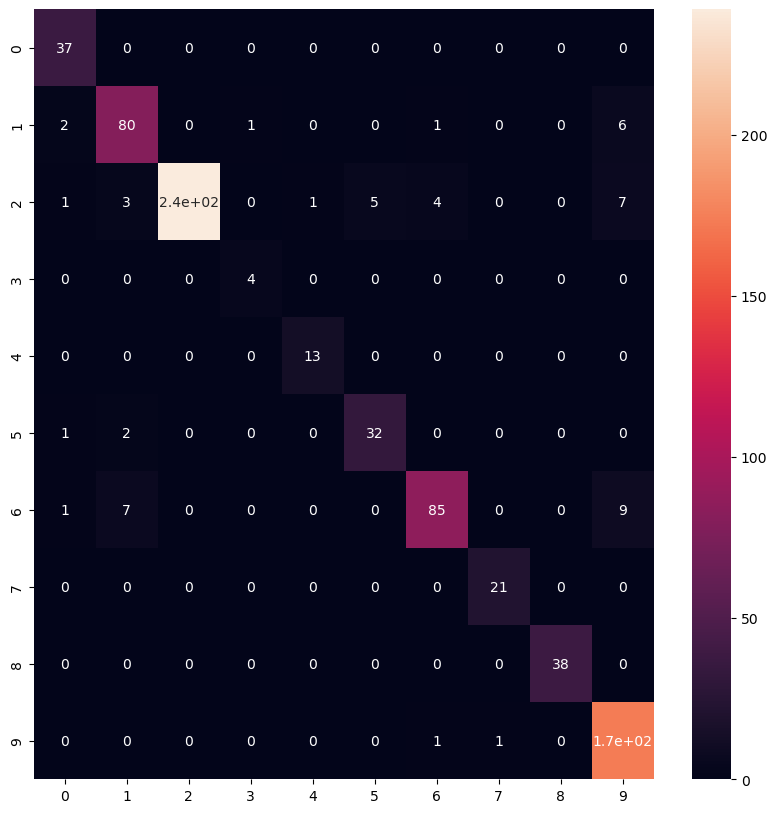

In [102]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix,annot=True)
plt.show()       

## checking performance per class

In [103]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report

precision    recall  f1-score     support
0              0.880952  1.000000  0.936709   37.000000
1              0.869565  0.888889  0.879121   90.000000
2              1.000000  0.919231  0.957916  260.000000
3              0.800000  1.000000  0.888889    4.000000
4              0.928571  1.000000  0.962963   13.000000
5              0.864865  0.914286  0.888889   35.000000
6              0.934066  0.833333  0.880829  102.000000
7              0.954545  1.000000  0.976744   21.000000
8              1.000000  1.000000  1.000000   38.000000
9              0.887179  0.988571  0.935135  175.000000
accuracy       0.931613  0.931613  0.931613    0.931613
macro avg      0.911974  0.954431  0.930719  775.000000
weighted avg   0.935451  0.931613  0.931648  775.000000